<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-ai-journey/blob/main/Lecture_16_Weight_Initialization_Techniques/Glorot_normal_weights_initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Import necessary libraries for data manipulation, numerical operations, and plotting.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Load the dataset from the specified CSV file into a pandas DataFrame.
df = pd.read_csv('/content/ushape.csv')

In [15]:
# Display the first few rows of the DataFrame to get a glimpse of the data structure and content.
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


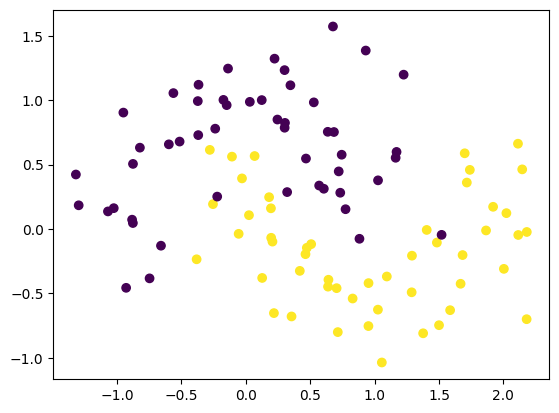

In [16]:
# Create a scatter plot of the 'X' and 'Y' columns, coloring the points based on their 'class' value.
plt.scatter(df['X'],df['Y'],c=df['class'])

In [17]:
# Separate the features (X and Y columns) and the target variable (class column) into numpy arrays.
x = df.iloc[:,0:2].values
y = df.iloc[:, -1].values

In [18]:
# Import the necessary modules from TensorFlow and Keras for building the neural network model.
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [19]:
# Create a sequential neural network model.
model = Sequential()

# Add hidden layers with 10 neurons each, using the tanh activation function and glorot_normal initializer.
model.add(Dense(10, activation='tanh', input_dim=2, kernel_initializer='glorot_normal')) #glorat_normal/ # glorat_uniform
model.add(Dense(10, activation='tanh', kernel_initializer='glorot_normal'))
model.add(Dense(10, activation='tanh', kernel_initializer='glorot_normal'))
model.add(Dense(10, activation='tanh', kernel_initializer='glorot_normal'))

# Add the output layer with 1 neuron and a sigmoid activation function for binary classification.
model.add(Dense(1, activation='sigmoid'))

# Print a summary of the model architecture, showing the layers, output shapes, and parameter counts.
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Get the initial weights of the neural network layers.
model.get_weights()

[array([[-0.19337699,  0.46664196,  0.8963358 , -0.57060903, -0.47572586,
          0.1102246 ,  0.14325106,  0.04683727, -0.12235363,  0.02499945],
        [-0.01862614,  0.02696828, -0.8819118 ,  0.6951625 ,  0.06450785,
          0.7848541 ,  0.62700677,  0.4193691 ,  0.14331225, -0.51180124]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.20572734, -0.6536061 ,  0.3922288 , -0.20141566, -0.03604002,
          0.19047056, -0.155841  ,  0.21321656,  0.41537473, -0.33279416],
        [-0.38173056,  0.12557638,  0.20730408,  0.05662122, -0.47760013,
          0.4376748 , -0.35028067, -0.26766518, -0.67171526, -0.2934144 ],
        [-0.16724159, -0.24887255,  0.2883172 , -0.21797706, -0.20114902,
         -0.5850475 , -0.06634291, -0.03865601,  0.3060168 ,  0.1054238 ],
        [-0.16698997,  0.53654265,  0.514147  , -0.5526529 , -0.17313573,
         -0.04403455, -0.05502116, -0.61515516, -0.06884064,  0.6668612 ],
        [ 0.59136

In [21]:
# Compile the model by specifying the loss function (binary_crossentropy), optimizer (Adam), and evaluation metric (accuracy).
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [22]:
# Train the neural network model using the training data (x and y).
# Train for 100 epochs, and use 20% of the data for validation.
history = model.fit(x,y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 229ms/step - accuracy: 0.4688 - loss: 0.6993 - val_accuracy: 0.4500 - val_loss: 0.6944
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6477 - loss: 0.6705 - val_accuracy: 0.6500 - val_loss: 0.6579
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6945 - loss: 0.6440 - val_accuracy: 0.8500 - val_loss: 0.6237
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7516 - loss: 0.6142 - val_accuracy: 0.9000 - val_loss: 0.5915
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.7688 - loss: 0.5987 - val_accuracy: 0.9000 - val_loss: 0.5621
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8383 - loss: 0.5710 - val_accuracy: 0.9000 - val_loss: 0.5348
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8508 - loss: 0.5471 - val_accuracy: 0.9000 - val_loss: 0.5097
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8250 - loss: 0.5372 - val_accuracy: 0.8500 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


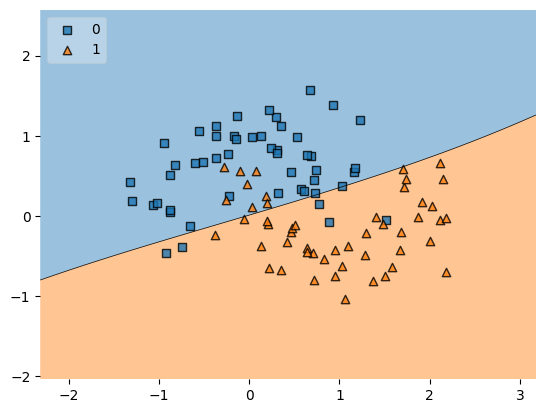

In [23]:
# Import the plot_decision_regions function from mlxtend for visualizing the decision boundary.
from mlxtend.plotting import plot_decision_regions

# Plot the decision boundary of the trained model on the data.
# The data (x) and labels (y) are provided, along with the trained classifier (model).
plot_decision_regions(x, y.astype('int') ,clf=model, legend=2)

# Display the plot.
plt.show()